In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from timeit import default_timer as timer


**Question 1**

Let A and B be two matrices of dimensions $(n, k)$ and $(k, m)$. The product of these matrices gives another matrix C of dimensions $(n, m)$.

$$
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,k} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,k} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n,1} & a_{n,2} & \cdots & a_{n,k} \\
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{1,1} & b_{1,2} & \cdots & b_{1,m} \\
b_{2,1} & b_{2,2} & \cdots & b_{2,m} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k,1} & b_{k,2} & \cdots & b_{k,m} \\
\end{bmatrix}
=
\begin{bmatrix}
c_{1,1} & c_{1,2} & \cdots & c_{1,m} \\
c_{2,1} & c_{2,2} & \cdots & c_{2,m} \\
\vdots & \vdots & \ddots & \vdots \\
c_{n,1} & c_{n,2} & \cdots & c_{n,m} \\
\end{bmatrix}
$$


An element $C_i,_j$ is calculated as follows:
$C_i,_j = \sum_{r=1}^{k} A_i,_r \times B_r,_j$

For each element in the resulting matrix, $k$ multiplication operations and $k-1$ addition operations need to be performed. Therefore, to perform this matrix multiplication, $n \times m \times k$ multiplication operations and $n \times m \times (k - 1)$ addition operartions need to be performed as there are a total of $n \times m  $ elements in the resulting matrix.


**Question 2**

In [111]:
np.random.seed(20)

n = 100
k = 110
m = 120

time1 = timer()

mat1 = np.random.rand(n, k)
mat2 = np.random.rand(k, m)

result = np.zeros((n, m))

for i in range(n):
    for j in range(m):
        for l in range(k):
            result[i][j] += mat1[i][l]*mat2[l][j]

time2 = timer()
print("Time taken to execute this is (in ms):", (time2-time1)*1000)
print(result)

Time taken to execute this is (in ms): 756.4689000000726
[[28.66491549 28.50294053 25.76415696 ... 28.74107608 29.55295587
  32.37102919]
 [33.29139605 31.46118019 28.51373717 ... 30.805212   32.17949378
  34.31758929]
 [30.07449957 28.29017293 26.90569818 ... 29.03342743 29.91470571
  32.11286811]
 ...
 [28.53440569 30.61108066 26.50742447 ... 28.36282831 30.4266762
  30.07604305]
 [27.84088627 26.53765646 23.1785576  ... 26.0913562  29.03826802
  28.19748032]
 [28.60629156 29.72229272 26.1914641  ... 30.05862537 29.86681048
  30.84722331]]


In [112]:
time1 = timer()

result = np.matmul(mat1, mat2)
time2 = timer()
print("Time taken to execute this using numpy is (in ms):", (time2-time1)*1000)
print(result)

Time taken to execute this using numpy is (in ms): 1.6996000003928202
[[28.66491549 28.50294053 25.76415696 ... 28.74107608 29.55295587
  32.37102919]
 [33.29139605 31.46118019 28.51373717 ... 30.805212   32.17949378
  34.31758929]
 [30.07449957 28.29017293 26.90569818 ... 29.03342743 29.91470571
  32.11286811]
 ...
 [28.53440569 30.61108066 26.50742447 ... 28.36282831 30.4266762
  30.07604305]
 [27.84088627 26.53765646 23.1785576  ... 26.0913562  29.03826802
  28.19748032]
 [28.60629156 29.72229272 26.1914641  ... 30.05862537 29.86681048
  30.84722331]]


The NumPy implemention is significantly faster than the normal implementation of multiplication of two matrices as NumPy has been implemented in such a manner where it makes use of parallel processing and optimises the computation, thus making it better to use.

**Question 3**

In [128]:
arr = np.random.randint(1, 200, size = 155)
arr1 = arr.copy()

def find_median(arr):
    n = len(arr)

    for i in range(n // 2 + 1):
        max_index = 0
        max_value = arr[0]

        for j in range(n - i):
            if arr[j] > max_value:
                max_value = arr[j]
                max_index = j

        arr[max_index], arr[n - i - 1] = arr[n - i - 1], arr[max_index]
    
    if n % 2 != 0:
        median = arr[n // 2]
    else:
        median = (arr[n // 2] + arr[n // 2 - 1]) / 2

    return median

time1 = timer()
print("The median of the array is:", find_median(arr))
time2 = timer()
time = time2 - time1
print("The time taken to find the median by using np.median function is:", time)

The median of the array is: 83
The time taken to find the median by using np.median function is: 0.0011915999994016602


The time complexity of this array is $O(n^2)$. A better method of finding the median of an array is by first sorting it by using a sorting algorithm of the order $O(nlog(n))$ and then finding the middle value to give us the median.

In [130]:
time1 = timer()
print(np.median(arr))
time2 = timer()
time = time2 - time1
print("The time taken to find the median by using np.median function is:", time)

83.0
The time taken to find the median by using np.median function is: 0.0002583999994385522


**Question 4**

The gradient of the following function with respect to $x$ is: $2xy + y^3cos(x)$


The gradient of the following function with respect to $y$ is: $x^2 + 3y^2sin(x)$

**Question 6**

In [116]:
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Gradient of the function with respect to x:", df_dx)
print("Gradient of the function with respect to y:", df_dy)

Gradient of the function with respect to x: 2*x*y + y**3*cos(x)
Gradient of the function with respect to y: x**2 + 3*y**2*sin(x)


**Question 7**

In [117]:
data_students = {
    2022: {
        "Branch 1": [{"Roll Number": 1, "Name": "N", "Marks": {"Maths": 100, "English": 70}}, 
                     {"Roll Number": 2, "Name": "M", "Marks": {"Maths": 90, "English": 80}}], 
        "Branch 2": []
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [], 
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
    }
#data in the empty places can be inserted in the same way as it is in the top with varying values. this is the overall framework of the nested dictionary

**Question 8**

In [118]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class Branch:
    def __init__(self, students):
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

students_2022_branch1 = [Student(1, 'N', {"Maths": 100, "English": 70}),
                         Student(2, 'M', {"Maths": 90, "English": 80})]

students_2022_branch2 = [Student(3, 'A', {"Maths": 99, "English": 98}),
                         Student(4, 'B', {"Maths": 89, "English": 87})]

branch1_2022 = Branch(students_2022_branch1)
branch2_2022 = Branch(students_2022_branch2)

year_2022 = Year(2022, [branch1_2022, branch2_2022])

#This is for the year 2022. Similarly, we repeat the same steps and can create and add data for the years 2023, 2024 and 2025.
#In the end, the database can be created by database = [Year(2022, [branch1_2022, branch2_2022]), Year(2023, [branch1_2023, branch2_2023]), Year(2024, [branch1_2024, branch2_2024]), Year(2025, [branch1_2025, branch2_2025])]


**Question 9**

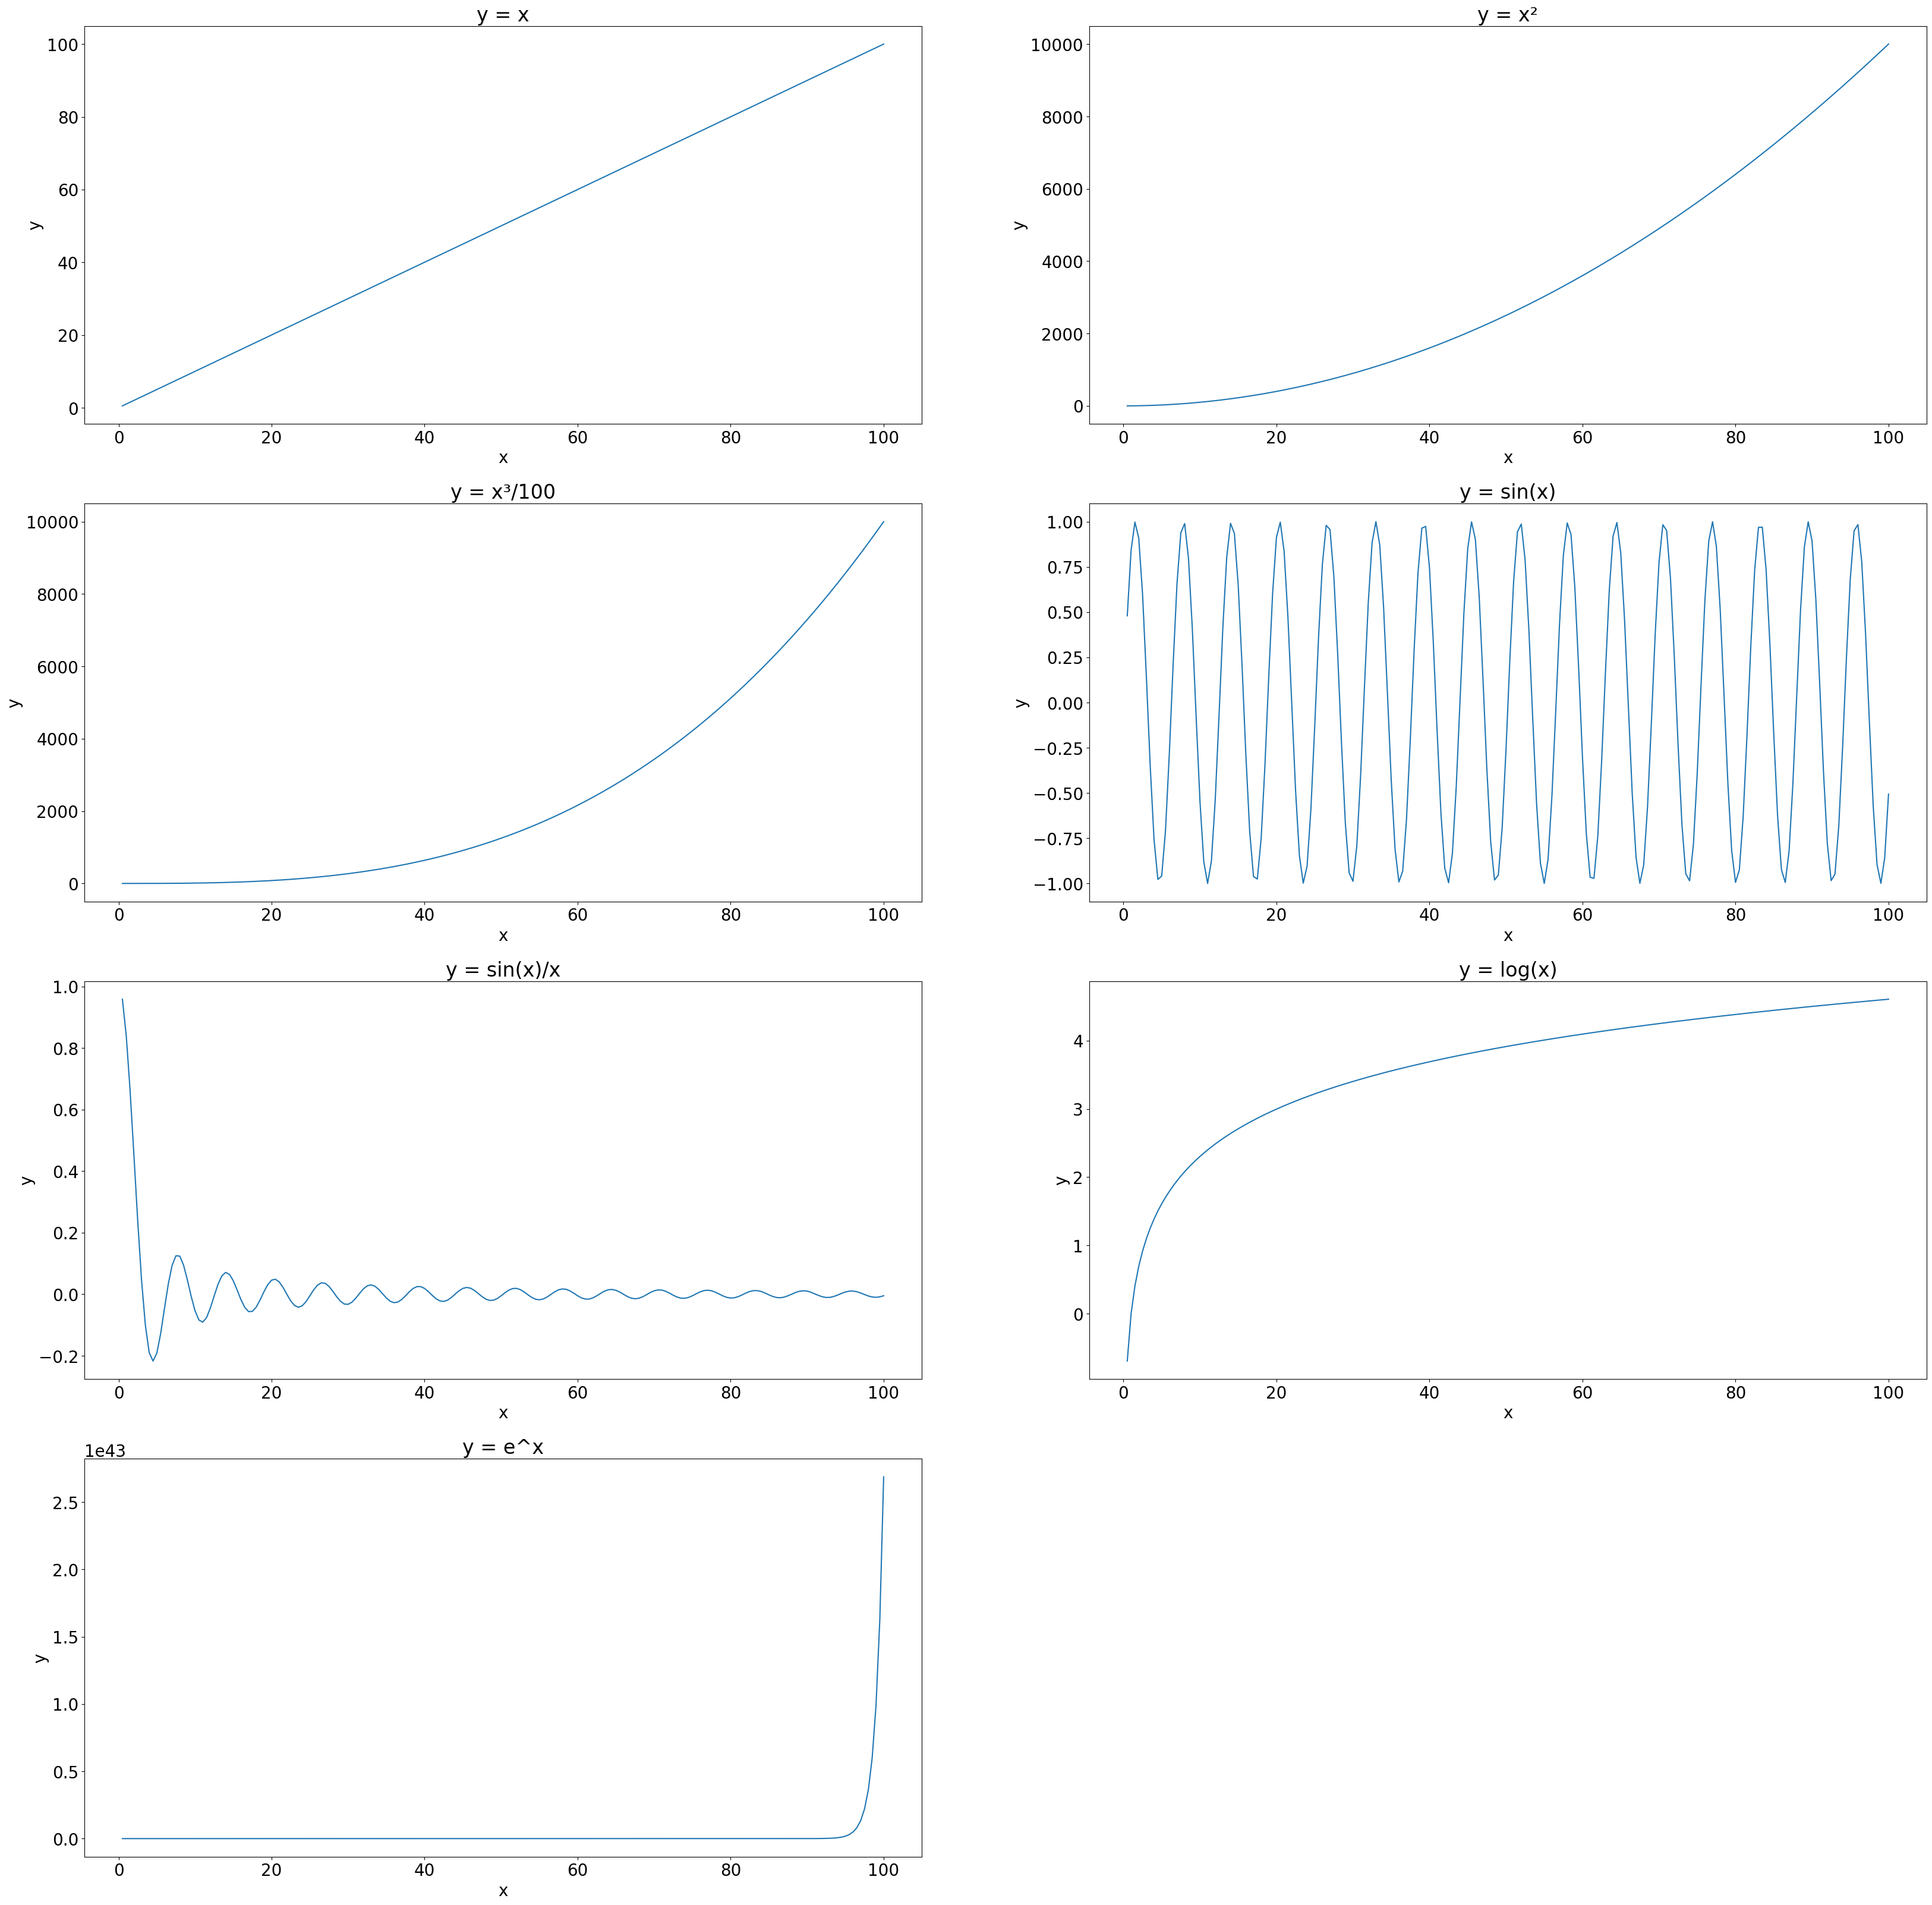

In [119]:
plt.rcParams.update({'font.size':20})

x_values = np.arange(0.5, 100.5, 0.5)

plt.figure(figsize=(40, 40))

# y=x
y = x_values
plt.subplot(4, 2, 1)
plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x")

# y=x^2
y = x_values**2
plt.subplot(4, 2, 2)
plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x\u00b2")

# y=x^3/100
y = (x_values**3)/100
plt.subplot(4, 2, 3)
plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = x\u00b3/100")

# y=sinx
y = np.sin(x_values)
plt.subplot(4, 2, 4)
plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = sin(x)")

# y=sinx/x
y = np.sin(x_values)/x_values
plt.subplot(4, 2, 5)
plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = sin(x)/x")

# y=logx
y = np.log(x_values)
plt.subplot(4, 2, 6)
plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = log(x)")

# y=e^x
y = np.exp(x_values)
plt.subplot(4, 2, 7)
plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("y = e^x")
plt.show()

**Question 10**

In [120]:
np.random.seed(10)

mat = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

print("The column with the maximum standard deviation is:", df.std().idxmax())
print("The row with the lowest mean is:", df.mean(axis=1).idxmin())

The column with the maximum standard deviation is: b
The row with the lowest mean is: 1


**Question 11**

In [121]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
#can also be implemented as df['f'] = df.sum(axis=1)

df['g'] = 0
df.loc[df['f']<8, 'g'] = 'LT8'
df.loc[df['f']>8, 'g'] = 'GT8'

print("The number of rows in the dataframe which have the value LT8 are:", (df['g']=='LT8').sum())

print("The standard deviation of the column f for the rows where the value in column g is LT8 is:", df.loc[df["g"] == "LT8", "f"].std())
print("The standard deviation of the column f for the rows where the value in column g is GT8 is:", df.loc[df["g"] == "GT8", "f"].std())

The number of rows in the dataframe which have the value LT8 are: 18
The standard deviation of the column f for the rows where the value in column g is LT8 is: 0.4846394296314647
The standard deviation of the column f for the rows where the value in column g is GT8 is: 0.14649863320158396


**Question 12**

In [122]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([50, 60, 70])

result = A + B

print("Array A:\n", A)
print()
print("Array B:\n", B)
print()
print("After broadcasting:\n", result)

Array A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Array B:
 [50 60 70]

After broadcasting:
 [[51 62 73]
 [54 65 76]
 [57 68 79]]


**Question 13**

In [123]:
def argmin_find(A):
    min_element = A[0]
    min_index = 0

    for i in range(len(A)):
        if A[i]<min_element:
            min_element = A[i]
            min_index = i
    
    return min_index

arr = np.array([5, 7, 3, 9, 10, 13, 29, 2, 13])

print("The index of the minimum element in the array is:", argmin_find(arr))


The index of the minimum element in the array is: 7


Verfication using np.argmin function

In [124]:
print("The index of the minimum element in the array is:", np.argmin(arr))

The index of the minimum element in the array is: 7
